In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from itertools import cycle
import seaborn as sns 
import requests

In [3]:
def get_data(suffixes, url):
    with requests.Session() as session:
        frames = []
        for suffix in suffixes:
            full_url = f"{url}{suffix}"

            try:
                response = session.get(full_url)
                response.raise_for_status()

                data = response.json()

                if 'data' in data:
                    season = suffix[:4]
                    df = pd.DataFrame(data['data'])
                    df.insert(1,"Sezon", season)
                    frames.append(df)
                else:
                    print(f"No 'data' key found in the response for {suffix}")
            except requests.RequestException as e:
                print(f"Request failed for {suffix}: {e}")
            except ValueError:
                print(f"Failed to parse JSON for {suffix}")

    if frames:
        return pd.concat(frames, ignore_index=True)
    else:
        return pd.DataFrame()

In [29]:
seasons = [2024,2025]
suffixes = [f"{season}bg" for season in seasons]
suffixes_tab = [f"{season}dru" for season in seasons]
base_url = 'https://node.gurustats.usermd.net:60519/pgee'
df_pgee_original = get_data(suffixes,base_url)
df_pgee_original_tab = get_data(suffixes_tab,base_url)

In [5]:
df_pgee_original

,_id,Sezon,KLUB,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,id
0,67045bb891822cec55a0bdab,2024,Wrocław,3.05,2.65,3.00,2.85,3.30,3.15,3.30,2.80,3.30,2.80,3.00,3.10,2.65,3.45,3.60,4
1,67045bb891822cec55a0bdac,2024,Leszno,2.43,2.93,2.64,2.64,3.36,2.71,2.43,2.79,2.50,2.93,2.93,3.07,3.00,2.71,2.79,5
2,67045bb891822cec55a0bdad,2024,Częstochowa,3.00,2.14,2.64,2.57,2.64,2.79,2.93,3.21,2.57,3.50,3.50,2.71,3.21,3.07,2.64,6
3,67045bb891822cec55a0bdae,2024,Zielona Góra,2.81,3.00,2.44,3.00,2.81,2.50,2.94,2.88,2.88,2.81,3.44,3.00,2.50,3.06,2.38,9
4,67045bb891822cec55a0bdaf,2024,Lublin,3.35,4.20,3.95,3.55,3.60,3.55,3.35,3.45,3.05,3.85,2.68,3.26,3.42,2.95,2.79,13
5,67045bb891822cec55a0bdb0,2024,Toruń,2.85,2.60,3.20,2.75,2.55,3.25,2.95,2.75,3.70,2.70,2.75,2.90,3.05,3.05,3.40,14
6,67045bb891822cec55a0bdb1,2024,Grudziądz,2.53,3.07,2.53,2.80,2.93,3.27,2.67,2.80,3.47,2.53,3.14,2.79,3.29,3.00,2.93,1
7,67045bb891822cec55a0bdb2,2024,Gorzów,3.68,3.05,3.16,3.58,2.74,2.53,3.11,3.21,2.32,2.84,2.74,3.05,2.84,2.63,3.16,10
8,685a5e4782496a39d4a204f2,2025,Wrocław,3.75,3.25,3.63,3.38,3.13,3.25,3.25,3.25,3.50,2.88,3.25,3.25,2.88,2.71,3.57,4
9,685a5e4782496a39d4a204f3,2025,Zielona Góra,3.22,3.67,2.44,2.67,2.67,3.22,2.44,3.56,2.22,3.11,2.00,2.78,3.22,2.78,3.11,9


In [30]:
df_pgee_original_tab

,_id,Sezon,KLUB,PKTTABELA,BONTABELA,PKTZDOBYTE,PKTSTRACONE,PLUSMINUS,Z,R,...,PROCPKTPOL,PROCPKTOBCO,STARTWYG,STARTPOR,DYSTWYG,DYSTPOR,STARTBIL,DYSTBIL,MSCTABELA,id
0,67045bb8cc786ae94f25f289,2024,Wrocław,19,4,920,878,42,11,1,...,0.727,0.273,587,562,130,121,25,9,2,4
1,67045bb8cc786ae94f25f28a,2024,Leszno,11,,586,673,-87,5,1,...,0.551,0.449,369,445,108,110,-76,-2,8,5
2,67045bb8cc786ae94f25f28b,2024,Gorzów,19,3,848,860,-52,10,,...,0.553,0.447,574,524,108,135,50,-27,4,10
3,67045bb8cc786ae94f25f28c,2024,Grudziądz,14,2,641,677,-76,6,,...,0.390,0.610,414,434,71,84,-20,-13,5,1
4,67045bb8cc786ae94f25f28d,2024,Toruń,15,3,889,909,-20,9,,...,0.728,0.272,527,633,155,117,-106,38,3,14
5,67045bb8cc786ae94f25f28e,2024,Częstochowa,12,2,604,654,-50,4,2,...,0.399,0.601,373,425,87,82,-52,5,7,6
6,67045bb8cc786ae94f25f28f,2024,Lublin,31,7,1005,764,241,17,,...,0.689,0.311,674,481,132,106,193,26,1,13
7,67045bb8cc786ae94f25f290,2024,Zielona Góra,13,3,679,757,-78,4,2,...,0.734,0.266,446,460,79,115,-14,-36,6,9
8,685a5e470ca89876ebe4f734,2025,Wrocław,11,1,385,322,63,5,,...,0.618,0.382,232,214,59,34,18,25,4,4
9,685a5e470ca89876ebe4f735,2025,Grudziądz,9,1,417,393,24,4,,...,0.441,0.559,263,261,68,58,2,10,5,1


In [31]:
df_pgee_original_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             16 non-null     object 
 1   Sezon           16 non-null     object 
 2   KLUB            16 non-null     object 
 3   PKTTABELA       16 non-null     int64  
 4   BONTABELA       16 non-null     object 
 5   PKTZDOBYTE      16 non-null     int64  
 6   PKTSTRACONE     16 non-null     int64  
 7   PLUSMINUS       16 non-null     int64  
 8   Z               16 non-null     int64  
 9   R               16 non-null     object 
 10  P               16 non-null     int64  
 11  PKTPER15        16 non-null     float64
 12  PKTDOMPER15     16 non-null     float64
 13  PKTWYJAZDPER15  16 non-null     float64
 14  WIEK            16 non-null     float64
 15  TRIUMFY         16 non-null     float64
 16  BONUSY          16 non-null     float64
 17  WYNIK51         16 non-null     int64

In [35]:
df_pgee_tab = df_pgee_original_tab.loc[:,["Sezon","MSCTABELA","KLUB"]].astype({"Sezon":int}).sort_values(by=["Sezon","MSCTABELA"])

In [36]:
df_pgee_tab

,Sezon,MSCTABELA,KLUB
6,2024,1,Lublin
0,2024,2,Wrocław
4,2024,3,Toruń
2,2024,4,Gorzów
3,2024,5,Grudziądz
7,2024,6,Zielona Góra
5,2024,7,Częstochowa
1,2024,8,Leszno
15,2025,1,Lublin
10,2025,2,Toruń


In [6]:
df_pgee = df_pgee_original.iloc[:,1:-1]

In [7]:
df_pgee

,Sezon,KLUB,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15
0,2024,Wrocław,3.05,2.65,3.00,2.85,3.30,3.15,3.30,2.80,3.30,2.80,3.00,3.10,2.65,3.45,3.60
1,2024,Leszno,2.43,2.93,2.64,2.64,3.36,2.71,2.43,2.79,2.50,2.93,2.93,3.07,3.00,2.71,2.79
2,2024,Częstochowa,3.00,2.14,2.64,2.57,2.64,2.79,2.93,3.21,2.57,3.50,3.50,2.71,3.21,3.07,2.64
3,2024,Zielona Góra,2.81,3.00,2.44,3.00,2.81,2.50,2.94,2.88,2.88,2.81,3.44,3.00,2.50,3.06,2.38
4,2024,Lublin,3.35,4.20,3.95,3.55,3.60,3.55,3.35,3.45,3.05,3.85,2.68,3.26,3.42,2.95,2.79
5,2024,Toruń,2.85,2.60,3.20,2.75,2.55,3.25,2.95,2.75,3.70,2.70,2.75,2.90,3.05,3.05,3.40
6,2024,Grudziądz,2.53,3.07,2.53,2.80,2.93,3.27,2.67,2.80,3.47,2.53,3.14,2.79,3.29,3.00,2.93
7,2024,Gorzów,3.68,3.05,3.16,3.58,2.74,2.53,3.11,3.21,2.32,2.84,2.74,3.05,2.84,2.63,3.16
8,2025,Wrocław,3.75,3.25,3.63,3.38,3.13,3.25,3.25,3.25,3.50,2.88,3.25,3.25,2.88,2.71,3.57
9,2025,Zielona Góra,3.22,3.67,2.44,2.67,2.67,3.22,2.44,3.56,2.22,3.11,2.00,2.78,3.22,2.78,3.11


In [8]:
df_pgee_melted = df_pgee.melt(id_vars=["Sezon","KLUB"],var_name="Bieg",value_name="Punkty")

In [9]:
df_pgee_melted.head()

,Sezon,KLUB,Bieg,Punkty
0,2024,Wrocław,B1,3.05
1,2024,Leszno,B1,2.43
2,2024,Częstochowa,B1,3.00
3,2024,Zielona Góra,B1,2.81
4,2024,Lublin,B1,3.35


In [10]:
df_pgee_melted["Bieg"] = df_pgee_melted["Bieg"].apply(lambda row: row[1:].strip()).astype(int)

In [11]:
df_pgee_melted

,Sezon,KLUB,Bieg,Punkty
0,2024,Wrocław,1,3.05
1,2024,Leszno,1,2.43
2,2024,Częstochowa,1,3.00
3,2024,Zielona Góra,1,2.81
4,2024,Lublin,1,3.35
...,...,...,...,...
235,2025,Częstochowa,15,3.00
236,2025,Lublin,15,3.67
237,2025,Toruń,15,2.78
238,2025,Gorzów,15,2.89


In [12]:
df_pgee_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sezon   240 non-null    object 
 1   KLUB    240 non-null    object 
 2   Bieg    240 non-null    int64  
 3   Punkty  240 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ KB


In [13]:
df_pgee_melted.isna().sum()

Sezon     0
KLUB      0
Bieg      0
Punkty    0
dtype: int64

In [14]:
df_sorted = df_pgee_melted.sort_values(by=["KLUB","Bieg","Sezon"])

In [15]:
df_sorted['Punkty_nastepny_sezon'] = df_sorted.groupby(["KLUB","Bieg"])["Punkty"].shift(-1)

In [16]:
df_sorted = df_sorted.reset_index(drop=True)

In [17]:
df_sorted

,Sezon,KLUB,Bieg,Punkty,Punkty_nastepny_sezon
0,2024,Częstochowa,1,3.00,2.63
1,2025,Częstochowa,1,2.63,NaN
2,2024,Częstochowa,2,2.14,2.75
3,2025,Częstochowa,2,2.75,NaN
4,2024,Częstochowa,3,2.64,2.88
...,...,...,...,...,...
235,2025,Zielona Góra,13,3.22,NaN
236,2024,Zielona Góra,14,3.06,2.78
237,2025,Zielona Góra,14,2.78,NaN
238,2024,Zielona Góra,15,2.38,3.11


In [18]:
df_sorted['Pct_change'] = df_sorted.apply(lambda row: (row['Punkty_nastepny_sezon']-row['Punkty'])*100/row['Punkty'], axis=1).round(1)

In [19]:
df_sorted

,Sezon,KLUB,Bieg,Punkty,Punkty_nastepny_sezon,Pct_change
0,2024,Częstochowa,1,3.00,2.63,-12.3
1,2025,Częstochowa,1,2.63,NaN,NaN
2,2024,Częstochowa,2,2.14,2.75,28.5
3,2025,Częstochowa,2,2.75,NaN,NaN
4,2024,Częstochowa,3,2.64,2.88,9.1
...,...,...,...,...,...,...
235,2025,Zielona Góra,13,3.22,NaN,NaN
236,2024,Zielona Góra,14,3.06,2.78,-9.2
237,2025,Zielona Góra,14,2.78,NaN,NaN
238,2024,Zielona Góra,15,2.38,3.11,30.7


In [20]:
df_2024 = df_sorted.loc[df_sorted["Sezon"]=='2024']
df_2025 = df_sorted.loc[df_sorted["Sezon"]=='2025']

In [21]:
pivot_2024 = df_2024.pivot(index="Bieg",columns="KLUB", values="Punkty")
pivot_2025 = df_2025.pivot(index="Bieg",columns="KLUB", values="Punkty")

In [37]:
pivot_2024

KLUB,Częstochowa,Gorzów,Grudziądz,Leszno,Lublin,Toruń,Wrocław,Zielona Góra
Bieg,,,,,,,,
1,3.00,3.68,2.53,2.43,3.35,2.85,3.05,2.81
2,2.14,3.05,3.07,2.93,4.20,2.60,2.65,3.00
3,2.64,3.16,2.53,2.64,3.95,3.20,3.00,2.44
4,2.57,3.58,2.80,2.64,3.55,2.75,2.85,3.00
5,2.64,2.74,2.93,3.36,3.60,2.55,3.30,2.81
6,2.79,2.53,3.27,2.71,3.55,3.25,3.15,2.50
7,2.93,3.11,2.67,2.43,3.35,2.95,3.30,2.94
8,3.21,3.21,2.80,2.79,3.45,2.75,2.80,2.88
9,2.57,2.32,3.47,2.50,3.05,3.70,3.30,2.88


In [ ]:
df_pgee_tab.loc[df_pgee_tab["Sezon"]==2024,"KLUB"]

array(['Lublin', 'Wrocław'], dtype=object)

C:\Users\Paweł\AppData\Local\Temp\ipykernel_10476\1659674375.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=2.0, rect=[0, 0, 1, 0.89])


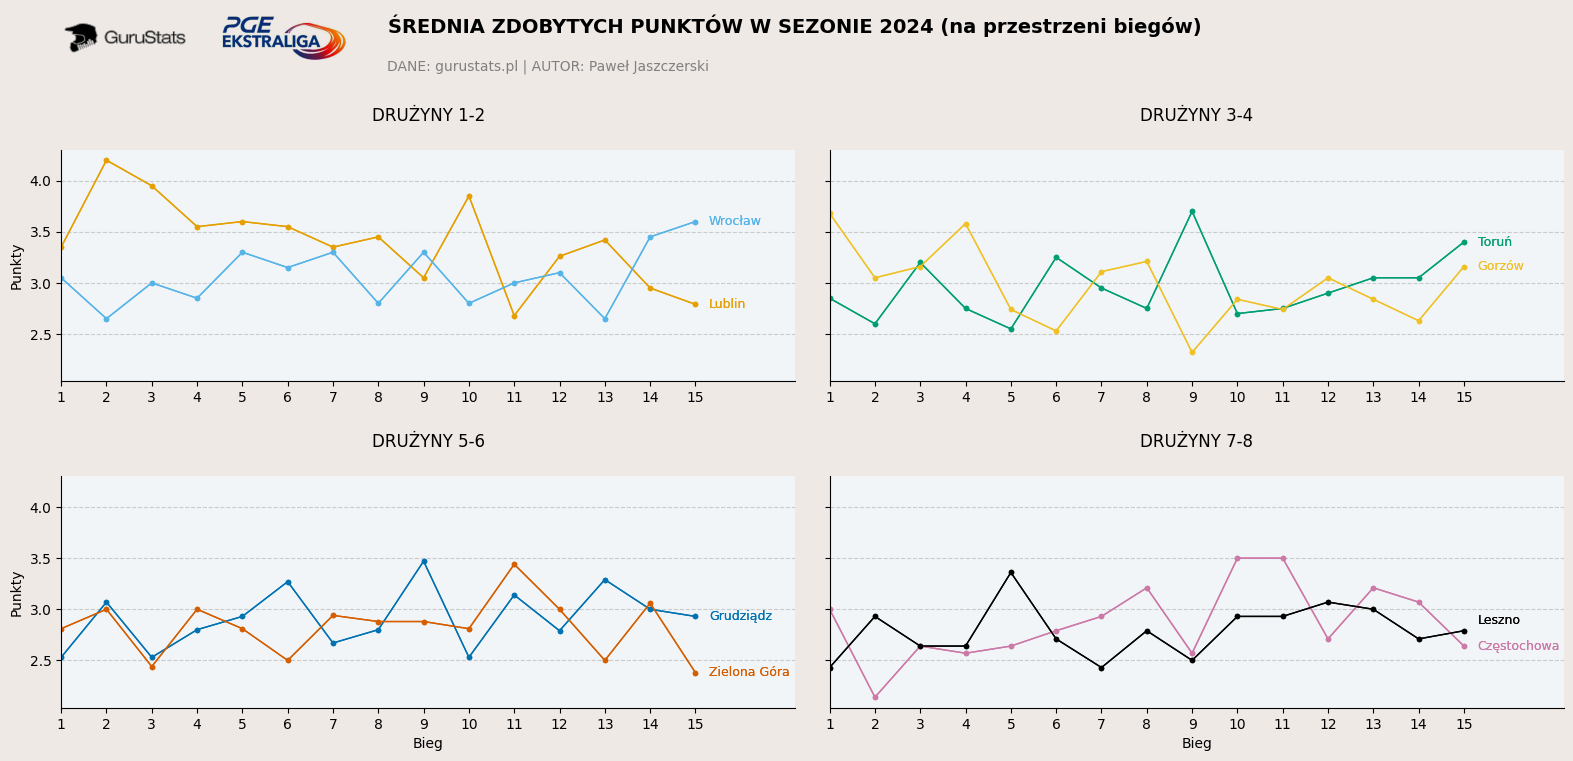

In [ ]:
kluby = df_pgee_tab.loc[df_pgee_tab["Sezon"]==2024,"KLUB"] 
kluby_grupa_1 = kluby[:2]
kluby_grupa_2 = kluby[2:4]
kluby_grupa_3 = kluby[4:6]
kluby_grupa_4 = kluby[6:8]

kolory = [
    "#E69F00", "#56B4E9", "#009E73", "#F0C125EE",
    "#0072B2", "#D55E00", "#CC79A7", "#000000"
]

background_color = "#F1F5F7FF" 
kolory_dict = dict(zip(kluby, kolory))

fig, axes = plt.subplots(2, 2, figsize=(16,8),facecolor="#EFE9E6", sharey=True)

def plot_grupa(ax, grupa_klubow, title):
    ax.set_facecolor(background_color)
    for klub in grupa_klubow:
        for klub in grupa_klubow:
            y = pivot_2024[klub]
            ax.plot(pivot_2024.index, y, 
                    label=klub, 
                    linewidth=1, 
                    color=kolory_dict[klub],
                    marker="o",
                    markersize=3
                    )
            if klub == 'Leszno':
                ax.text(pivot_2024.index[-1] + 0.3, y.iloc[-1] + 0.1, 
                        klub, 
                        color=kolory_dict[klub],
                        fontsize=9, va='center')
            else:
                ax.text(pivot_2024.index[-1] + 0.3, y.iloc[-1], 
                        klub, 
                        color=kolory_dict[klub],
                        fontsize=9, va='center')

    ax.set_title(title, fontsize=12, pad=21)
    ax.set_xticks(range(1, 16))
    ax.spines[['top','right']].set_visible(False)
    ax.grid(axis='y', linestyle="--", alpha=0.6)
    ax.set_xlim(1, 17.2)

# Rysujemy obie grupy
plot_grupa(axes[0,0], kluby_grupa_1, "DRUŻYNY 1-2")
plot_grupa(axes[0,1], kluby_grupa_2, "DRUŻYNY 3-4")
plot_grupa(axes[1,0], kluby_grupa_3, "DRUŻYNY 5-6")
plot_grupa(axes[1,1], kluby_grupa_4, "DRUŻYNY 7-8")

#Etykieta ogólna
title_obj = fig.suptitle("ŚREDNIA ZDOBYTYCH PUNKTÓW W SEZONIE 2024 (na przestrzeni biegów)", y=0.94, fontsize=14, weight='bold')
x_pos = title_obj.get_position()[0]
y_pos = title_obj.get_position()[1]

fig.text(x_pos - 0.255,
         y_pos - 0.07,
         "DANE: gurustats.pl | AUTOR: Paweł Jaszczerski",
         fontsize=10,
         ha='left',
         color='gray'
         )

axes[0,0].set_ylabel("Punkty")
axes[1,0].set_ylabel("Punkty")
axes[1,0].set_xlabel("Bieg")
axes[1,1].set_xlabel("Bieg")

#dodawanie loga
logo_pge = mpimg.imread('I:/Projects/PGE Ekstraliga punkty na bieg team/img/pge-ekstraliga_logo.png')
logo_pge_ax = fig.add_axes([0.14, 0.87, 0.08,0.08])
logo_pge_ax.imshow(logo_pge)
logo_pge_ax.axis('off')

logo_gurustats = mpimg.imread('I:/Projects/PGE Ekstraliga punkty na bieg team/img/gurustats_inverted.png')
logo_guru_ax = fig.add_axes([0.04, 0.87, 0.08, 0.08])
logo_guru_ax.imshow(logo_gurustats)
logo_guru_ax.axis('off')

plt.subplots_adjust(hspace=0.35)
plt.tight_layout(h_pad=2.0, rect=[0, 0, 1, 0.89])
plt.show()


C:\Users\Paweł\AppData\Local\Temp\ipykernel_10476\2016113260.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=2.0, rect=[0, 0, 1, 0.89])


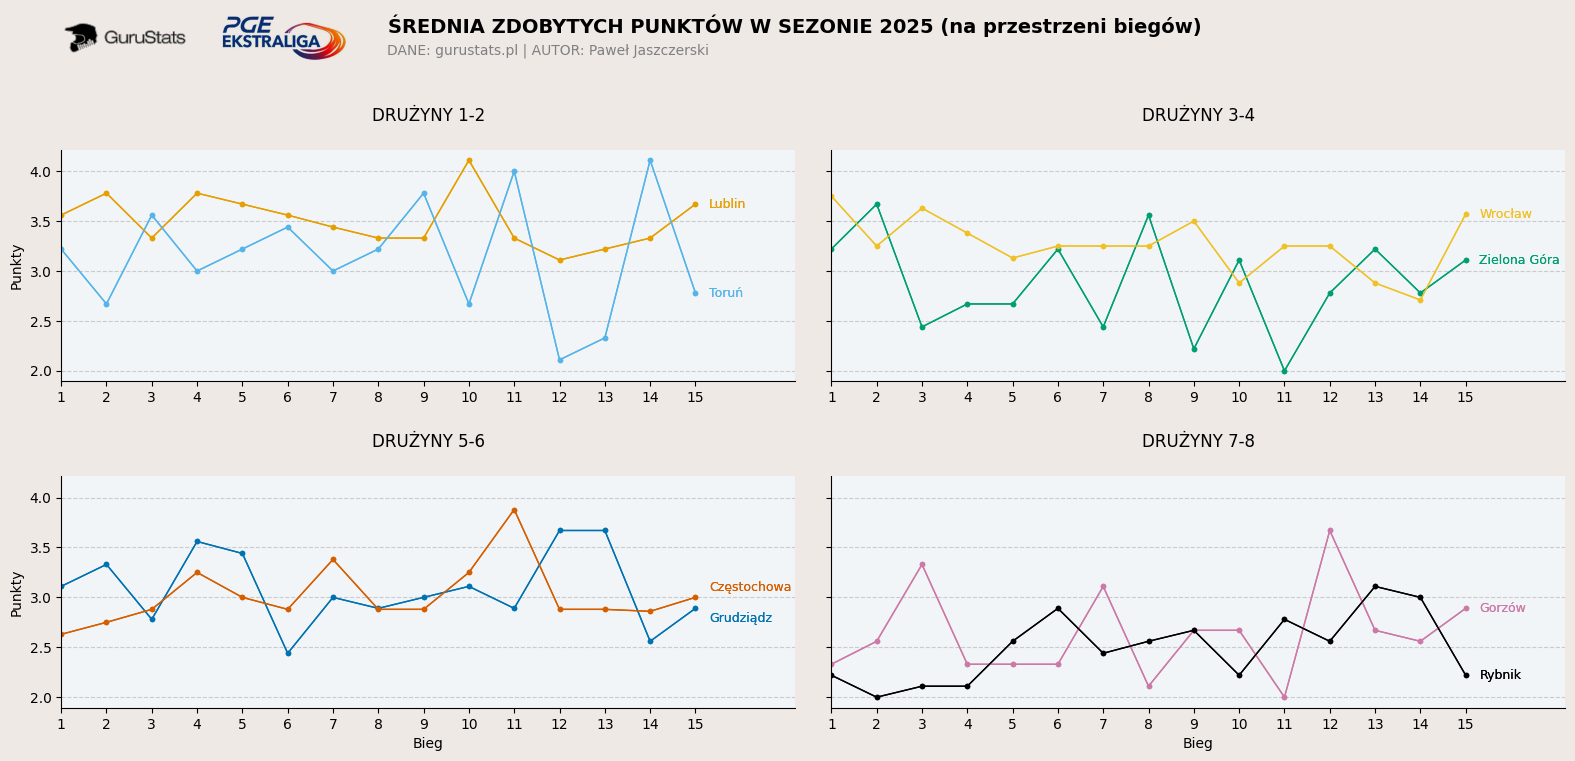

In [247]:
kluby = df_pgee_tab.loc[df_pgee_tab["Sezon"]==2025,"KLUB"]
kluby_grupa_1 = kluby[:2]
kluby_grupa_2 = kluby[2:4]
kluby_grupa_3 = kluby[4:6]
kluby_grupa_4 = kluby[6:8]

kolory = [
    "#E69F00", "#56B4E9", "#009E73", "#F0C125EE",
    "#0072B2", "#D55E00", "#CC79A7", "#000000"
]

background_color = "#F1F5F7FF" 
kolory_dict = dict(zip(kluby, kolory))

fig, axes = plt.subplots(2, 2, figsize=(16,8),facecolor="#EFE9E6", sharey=True)

def plot_grupa(ax, grupa_klubow, title):
    ax.set_facecolor(background_color)
    for klub in grupa_klubow:
        for klub in grupa_klubow:
            y = pivot_2025[klub]
            ax.plot(pivot_2025.index, y, 
                    label=klub, 
                    linewidth=1, 
                    color=kolory_dict[klub],
                    marker="o",
                    markersize=3
                    )
            if klub == 'Grudziądz':
                ax.text(pivot_2025.index[-1] + 0.3, y.iloc[-1] - 0.1, 
                            klub, 
                            color=kolory_dict[klub],
                            fontsize=9, va='center')
            elif klub == 'Częstochowa':
                ax.text(pivot_2025.index[-1] + 0.3, y.iloc[-1] + 0.1, 
                        klub, 
                        color=kolory_dict[klub],
                        fontsize=9, va='center')
            else:
                ax.text(pivot_2025.index[-1] + 0.3, y.iloc[-1], 
                        klub, 
                        color=kolory_dict[klub],
                        fontsize=9, va='center')

    ax.set_title(title, fontsize=12, pad=21)
    ax.set_xticks(range(1, 16))
    ax.spines[['top','right']].set_visible(False)
    ax.grid(axis='y', linestyle="--", alpha=0.6)
    ax.set_xlim(1, 17.2)

# Rysujemy obie grupy
plot_grupa(axes[0,0], kluby_grupa_1, "DRUŻYNY 1-2")
plot_grupa(axes[0,1], kluby_grupa_2, "DRUŻYNY 3-4")
plot_grupa(axes[1,0], kluby_grupa_3, "DRUŻYNY 5-6")
plot_grupa(axes[1,1], kluby_grupa_4, "DRUŻYNY 7-8")

#Etykieta ogólna
title_obj = fig.suptitle("ŚREDNIA ZDOBYTYCH PUNKTÓW W SEZONIE 2025 (na przestrzeni biegów)", y=0.94, fontsize=14, weight='bold')
x_pos = title_obj.get_position()[0]
y_pos = title_obj.get_position()[1]

fig.text(x_pos - 0.255,
         y_pos - 0.05,
         "DANE: gurustats.pl | AUTOR: Paweł Jaszczerski",
         fontsize=10,
         ha='left',
         color='gray'
         )

axes[0,0].set_ylabel("Punkty")
axes[1,0].set_ylabel("Punkty")
axes[1,0].set_xlabel("Bieg")
axes[1,1].set_xlabel("Bieg")

#dodawanie loga
logo_pge = mpimg.imread('I:/Projects/PGE Ekstraliga punkty na bieg team/img/pge-ekstraliga_logo.png')
logo_pge_ax = fig.add_axes([0.14, 0.87, 0.08,0.08])
logo_pge_ax.imshow(logo_pge)
logo_pge_ax.axis('off')

logo_gurustats = mpimg.imread('I:/Projects/PGE Ekstraliga punkty na bieg team/img/gurustats_inverted.png')
logo_guru_ax = fig.add_axes([0.04, 0.87, 0.08, 0.08])
logo_guru_ax.imshow(logo_gurustats)
logo_guru_ax.axis('off')

plt.subplots_adjust(hspace=0.35)
plt.tight_layout(h_pad=2.0, rect=[0, 0, 1, 0.89])
plt.show()

In [50]:
df_sorted

,Sezon,KLUB,Bieg,Punkty,Punkty_nastepny_sezon,Pct_change
0,2024,Częstochowa,1,3.00,2.63,-12.3
1,2025,Częstochowa,1,2.63,NaN,NaN
2,2024,Częstochowa,2,2.14,2.75,28.5
3,2025,Częstochowa,2,2.75,NaN,NaN
4,2024,Częstochowa,3,2.64,2.88,9.1
...,...,...,...,...,...,...
235,2025,Zielona Góra,13,3.22,NaN,NaN
236,2024,Zielona Góra,14,3.06,2.78,-9.2
237,2025,Zielona Góra,14,2.78,NaN,NaN
238,2024,Zielona Góra,15,2.38,3.11,30.7


In [58]:
df_sorted.loc[df_sorted["KLUB"]=='Rybnik',"Pct_change"] = df_sorted.loc[df_sorted["KLUB"]=='Rybnik',"Pct_change"].fillna(0)

In [ ]:
df_filtered = df_sorted.loc[~df_sorted["Pct_change"].isna()]

,Sezon,KLUB,Bieg,Punkty,Punkty_nastepny_sezon,Pct_change


In [83]:
df_filtered

,Sezon,KLUB,Bieg,Punkty,Punkty_nastepny_sezon,Pct_change
0,2024,Częstochowa,1,3.00,2.63,-12.3
2,2024,Częstochowa,2,2.14,2.75,28.5
4,2024,Częstochowa,3,2.64,2.88,9.1
6,2024,Częstochowa,4,2.57,3.25,26.5
8,2024,Częstochowa,5,2.64,3.00,13.6
...,...,...,...,...,...,...
230,2024,Zielona Góra,11,3.44,2.00,-41.9
232,2024,Zielona Góra,12,3.00,2.78,-7.3
234,2024,Zielona Góra,13,2.50,3.22,28.8
236,2024,Zielona Góra,14,3.06,2.78,-9.2


C:\Users\Paweł\AppData\Local\Temp\ipykernel_10476\3285262151.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=2.0, rect=[0, 0, 1, 0.89])


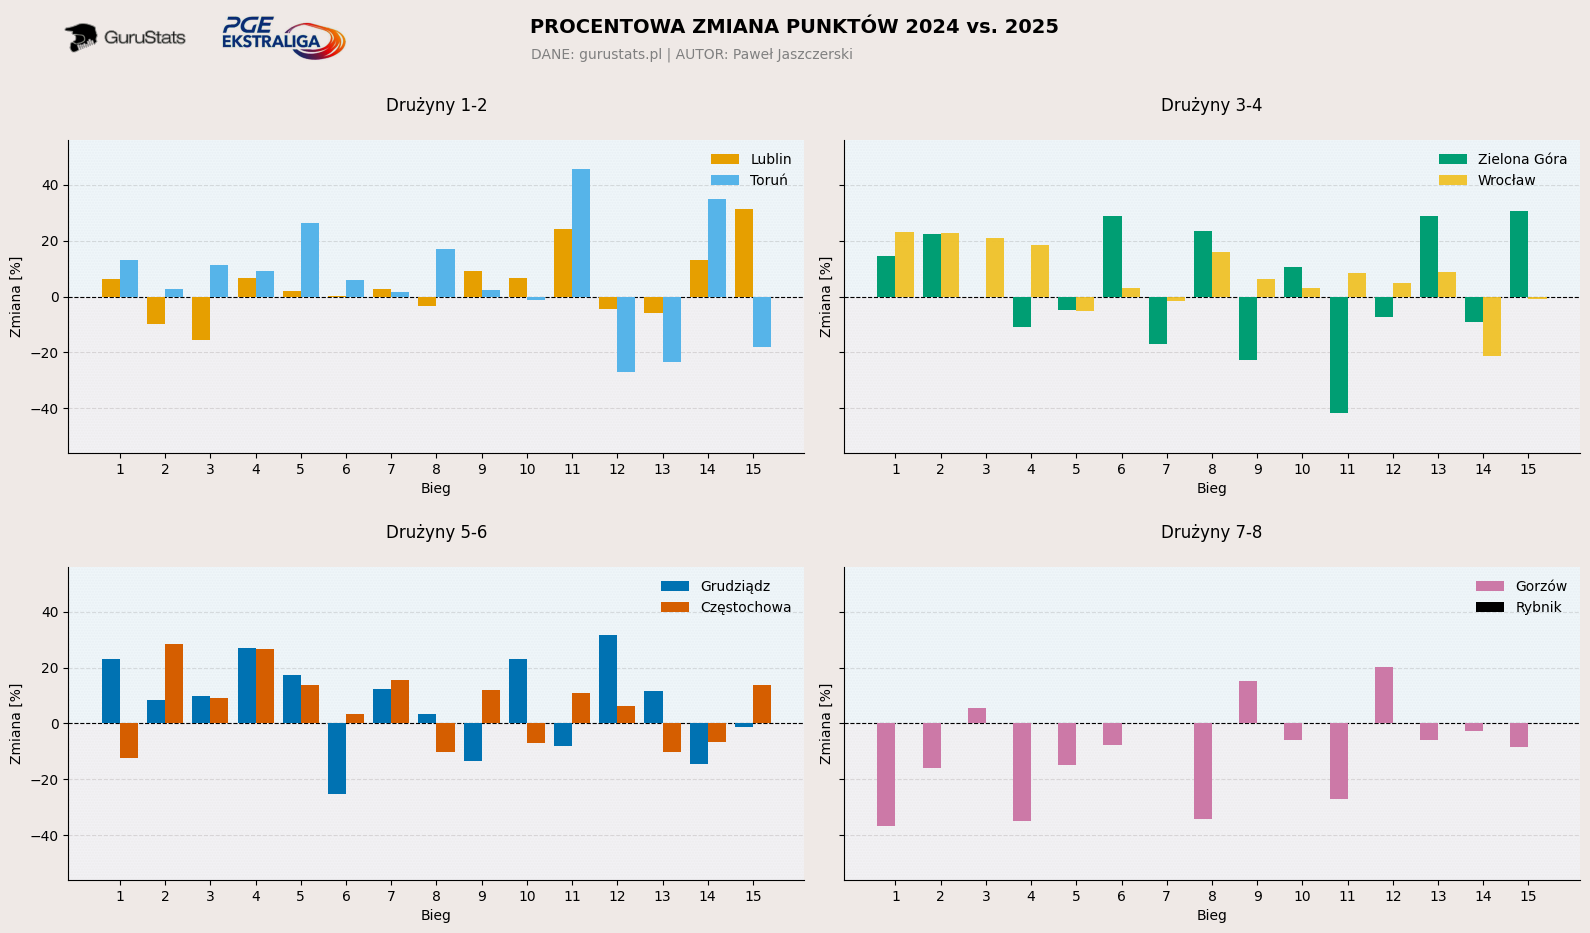

In [248]:
# Lista unikalych klubów
kluby = df_pgee_tab.loc[df_pgee_tab["Sezon"]==2025,"KLUB"].values
grupy_klubow = [kluby[i:i+2] for i in range(0, len(kluby),2)]

kolory = [
    "#E69F00", "#56B4E9", "#009E73", "#F0C125EE",
    "#0072B2", "#D55E00", "#CC79A7", "#000000"
]

kolory_dict = dict(zip(kluby, kolory))

fig, axes = plt.subplots(2, 2, figsize=(16,10),facecolor="#EFE9E6" ,sharey=True)
axes = axes.flatten()

# Rozmiar przesunięcia miedzy słupkami (dla 2 klubów)
bar_width = 0.4

for i, grupa in enumerate(grupy_klubow):
    ax = axes[i]

    # Dane tylko dla tych dwóch klubów
    df_grupa = df_filtered[df_filtered["KLUB"].isin(grupa)]
    miejsca = df_pgee_tab.loc[(df_pgee_tab["Sezon"]==2025) & (df_pgee_tab["KLUB"].isin(grupa)),"MSCTABELA"].values

    for j, klub in enumerate(grupa):
        team_msc = []
        df_klub = df_grupa[df_grupa["KLUB"] == klub].sort_values("Bieg")

        # Przesunięcie osi X
        x = np.array(df_klub['Bieg'])
        x_pos = x - bar_width/2 + j * bar_width

        ax.bar(x_pos, df_klub['Pct_change'], width=bar_width, label=klub, color=kolory_dict[klub], zorder=3)

    y_max = df_filtered['Pct_change'].max()
    y_min = df_filtered['Pct_change'].min()
    
    y_margin = 10
    y_lim_max = round(max(abs(y_min), y_max) + y_margin, 0)
    y_lim_min = - y_lim_max

    ax.set_ylim(y_lim_min, y_lim_max)
    # Ustawienie koloru tła w zależności od wartości y
    ax.axhspan(y_lim_min, 0, facecolor=None, alpha=0.05, hatch='......', edgecolor='gray', linewidth=0, zorder=0.5 )
    ax.axhspan(y_lim_min, 0, facecolor='lightcoral', alpha=0.05, zorder=2)  # Below 0 - light red
    ax.axhspan(0, y_lim_max, facecolor=None, alpha=0.05, hatch='......', edgecolor='gray', linewidth=0, zorder=0.5)
    ax.axhspan(0, y_lim_max, facecolor='lightblue', alpha=0.05, zorder=2)   # Above 0 - light blue

    

    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.spines[['top','right']].set_visible(False)
    ax.set_title(f"Drużyny {miejsca[0]}-{miejsca[1]}", pad=21)
    ax.set_xlabel("Bieg")
    ax.set_ylabel("Zmiana [%]")
    ax.set_xticks(range(1, 16))
    ax.grid(axis='y', linestyle="--", alpha=0.4)
    ax.legend(frameon=False)


#dodawanie loga
logo_pge = mpimg.imread('I:/Projects/PGE Ekstraliga punkty na bieg team/img/pge-ekstraliga_logo.png')
logo_pge_ax = fig.add_axes([0.14, 0.86, 0.08,0.08])
logo_pge_ax.imshow(logo_pge)
logo_pge_ax.axis('off')

logo_gurustats = mpimg.imread('I:/Projects/PGE Ekstraliga punkty na bieg team/img/gurustats_inverted.png')
logo_guru_ax = fig.add_axes([0.04, 0.86, 0.08, 0.08])
logo_guru_ax.imshow(logo_gurustats)
logo_guru_ax.axis('off')

title_obj = fig.suptitle("PROCENTOWA ZMIANA PUNKTÓW 2024 vs. 2025", y=0.92, fontsize=14, weight='bold')
x_pos = title_obj.get_position()[0]
y_pos = title_obj.get_position()[1]

fig.text(x_pos - 0.165,
         y_pos - 0.04,
         "DANE: gurustats.pl | AUTOR: Paweł Jaszczerski",
         fontsize=10,
         ha='left',
         color='gray'
         )

plt.subplots_adjust(hspace=0.35)
plt.tight_layout(h_pad=2.0, rect=[0, 0, 1, 0.89])
plt.show()